In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from cryo_sbi.inference.train_npe_model import npe_train_no_saving
from cryo_sbi.wpa_simulator.noise import correlated_gaussian_noise
from cryo_sbi import CryoEmSimulator

/home/dingeldein/anaconda3/envs/cryo_sbi/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_config = "../experiments/6wxb/resnet18_fft_encoder.json"
image_config = "image_params_mixed_training.json"
model_config = "../experiments/6wxb/resnet18_fft_encoder.json"

../data/protein_models/6wxb_mixed_models.npy


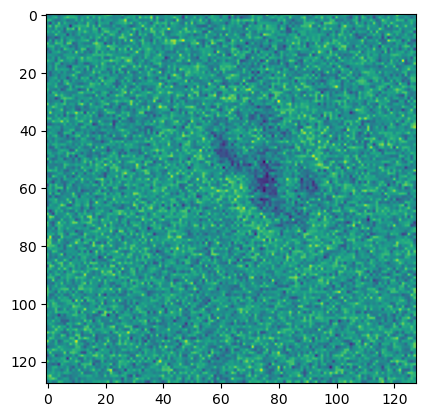

In [3]:
cryo_simulator = CryoEmSimulator(image_config, add_noise=correlated_gaussian_noise)
plt.imshow(cryo_simulator.simulator(torch.tensor(50.0)))

In [4]:
npe_train_no_saving(
    image_config=image_config,
    train_config=train_config,
    epochs=50,
    estimator_file="fine_tune_posterior2",
    loss_file="fine_tuning_loss2",
    train_from_checkpoint=True,
    model_state_dict="fine_tune_posterior",
    n_workers=24,
    device="cuda",
    saving_frequency=10,
    **{"add_noise": correlated_gaussian_noise}
)

../data/protein_models/6wxb_mixed_models.npy
Loading model parameters from fine_tune_posterior
Training neural netowrk:


100%|██████████| 50/50 [11:49:42<00:00, 851.66s/epoch, loss=-.0335]  


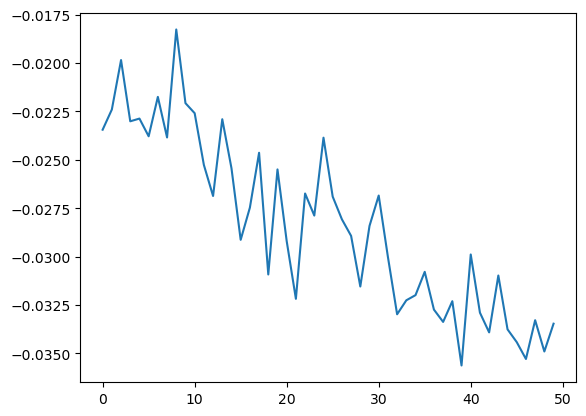

In [8]:
plt.plot(torch.load("fine_tuning_loss2"))

In [1]:
import torch.nn as nn
import torch

/home/dingeldein/anaconda3/envs/cryo_sbi/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
